# ADA final exam (Fall 2021)

This exam consists of 2 parts.
The first part has 3 tasks.
The second part has 2 tasks.
The two parts are completely independent of each other.

## Important: The data used for this exam **is not entirely real.** A great deal of it has been artificially created or modified. Conclusions drawn from this data have no real link to reality!

In [1]:
%matplotlib inline

# General
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For graph-related stuff
import networkx as nx

# For regression analyses and statistical tests
import scipy.stats as stats
import statsmodels.stats
import statsmodels.formula.api as smf

# For classification
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from operator import itemgetter
from sklearn.linear_model import LogisticRegression


## Part 1 — Faculty hiring network

For the first part of the exam, you will analyze data from a faculty hiring network. After completing their Ph.D., researchers who want to pursue an academic career must compete for relatively few permanent positions (as “faculty”, i.e., professors) in a highly competitive job market. You will analyze a directed graph that captures the dynamics of this hiring process in the United States:


- Each node $u$ in this graph represents a different American university.
- For each university, we also provide a score that captures how highly  this university is ranked (e.g., Stanford University is ranked more highly than the University of Alabama). The higher the score, the more highly ranked the university.
- Each directed edge $(u,v)$ in this graph represents a hiring decision where someone who did their Ph.D. at university $u$ subsequently was hired by university $v$. Each edge is also associated with a gender label, which specifies if the person hired was a man (M) or a woman (F).
- Note that, when multiple researchers were trained at a given university $u$ and subsequently hired by university $v$, there will be multiple edges pointing from $u$ to $v$, each of which corresponds to a different person.


## Files (in the `./data/part-1/` folder)

- `nodelist.tsv` a tab-separated file containing the nodes of the graph. Recall that each node represents a different university. The file has these columns:
    - `u` — the node index;
    - `score` — the rank of the university (the higher the better);
    - `name` — the name of the university.

- `edgelist.tsv` a tab-separated file containing the edges of the graph. Recall that each edge represents a hiring decision. The file has columns:
    - `u` — the source university, where the person got their Ph.D.;
    - `v` — the target university, where the person was hired;
    - `gender` — the gender of the person.


### Task 1 — (20 points)

1. Using the above files, create the directed graph representing the hiring network using `networkx`.
Each node should contain the attributes `score` and `name`, and each edge should contain the attribute `gender`.
Print the total numbers of nodes and edges in the graph.

2. Create a plot that allows you to easily visualize **(a)** what fraction of all researchers in the graph are hired by the $N$ universities that hire the most; and  **(b)** what fraction of all researchers in the graph are trained by the $N$ universities whose students get hired the most.
Here, $N$ could be any number between 1 and the number of universities.

3. **/Multiple choice:/** Which centrality metric(s) is/are illustrated in the plot you made for the previous subtask? Select all that apply from the list below and **justify your answer.**
    1. Betweenness centrality
    2. In-degree centrality
    3. Out-degree centrality
    4. PageRank centrality

4. **/True or false:/** Search engines such as Google have historically used PageRank centrality as a signal to determine the importance of pages on the Web. Is the following statement **true** or **false**? Justify. **"In the faculty hiring network, PageRank centrality is positively correlated with university score, that is, universities with higher scores are more likely to also have higher PageRank centrality."**


1.

In [3]:
nodes = pd.read_csv('data/part-1/nodelist.tsv', sep='\t')
edges = pd.read_csv('data/part-1/edgelist.tsv', sep='\t')

In [4]:
nodes = nodes.set_index('u')
nodes.head()

,score,name
u,,
1,100.000000,Stanford University
2,99.956665,UC Berkeley
3,99.301230,MIT
4,98.369536,California Institute of Technology
5,97.892855,Harvard University


In [5]:
G = nx.from_pandas_edgelist(edges, source='u', target='v', edge_attr='gender', create_using=nx.MultiDiGraph())

In [6]:
nx.set_node_attributes(G, nodes.score.to_dict(), 'score')
nx.set_node_attributes(G, nodes.name.to_dict(), 'name')

In [7]:
list(G.edges(data=True))[:10]

[(1, 1, {'gender': 'F'}),
 (1, 1, {'gender': 'F'}),
 (1, 1, {'gender': 'F'}),
 (1, 1, {'gender': 'M'}),
 (1, 1, {'gender': 'M'}),
 (1, 1, {'gender': 'F'}),
 (1, 1, {'gender': 'F'}),
 (1, 1, {'gender': 'F'}),
 (1, 1, {'gender': 'M'}),
 (1, 2, {'gender': 'F'})]

In [8]:
list(G.nodes(data=True))[:10]

[(1, {'score': 100.0, 'name': 'Stanford University'}),
 (2, {'score': 99.95666540274092, 'name': 'UC Berkeley'}),
 (3, {'score': 99.30122961919722, 'name': 'MIT'}),
 (5, {'score': 97.8928552082769, 'name': 'Harvard University'}),
 (6, {'score': 96.71740425762418, 'name': 'Cornell University'}),
 (7, {'score': 96.18113861654297, 'name': 'Carnegie Mellon University'}),
 (8, {'score': 96.15947131791344, 'name': 'Princeton University'}),
 (9, {'score': 95.80196089052598, 'name': 'Yale University'}),
 (10, {'score': 95.2169438275283, 'name': 'University of Washington'}),
 (11,
  {'score': 93.93315638372783,
   'name': 'University of Illinois, Urbana Champaign'})]

In [9]:
nnodes = len(G.nodes)
nedges = len(G.edges)

print(f'The graph has {nnodes} nodes and {nedges} edges')

The graph has 205 nodes and 4388 edges


2.

To get the N universities that hire the most, we can rank nodes based on their in-degree. Viceversa, the N universities whose students get hired the most are the ones with highest out-degree.

In [10]:
N = 10

In [11]:
in_degrees = dict(G.in_degree)
topN_hiring = sorted(in_degrees.items(), key=itemgetter(1), reverse=True)[:N]
print(topN_hiring)

topN_hiring_nodes = list(zip(*topN_hiring))[0]

[(7, 116), (37, 77), (3, 67), (55, 63), (28, 53), (21, 50), (191, 50), (111, 49), (1, 47), (6, 47)]


In [12]:
out_degrees = dict(G.out_degree)
topN_hired = sorted(out_degrees.items(), key=itemgetter(1), reverse=True)[:N]
print(topN_hired)

topN_hired_nodes = list(zip(*topN_hired))[0]

[(3, 299), (2, 204), (1, 189), (7, 166), (11, 164), (21, 145), (6, 113), (35, 99), (18, 94), (12, 87)]


Researchers in the graph correspond with edges.

In [13]:
# Again we find the same results.
number_hiring = edges.groupby('v').u.count().sort_values(ascending=False) 
number_hired = edges.groupby('u').v.count().sort_values(ascending=False)

number_hiring[:N]

v
7      116
37      77
3       67
55      63
28      53
191     50
21      50
111     49
1       47
6       47
Name: u, dtype: int64

In [14]:
# prepare data for plotting, associating index to name and dividing counts by number of researchers
plot_hiring = number_hiring[:N] / len(edges)
plot_hiring.index = nodes.loc[plot_hiring.index].name
plot_hired = number_hired[:N]  / len(edges)
plot_hired.index = nodes.loc[plot_hired.index].name
plot_hiring

name
Carnegie Mellon University    0.026436
Georgia Tech                  0.017548
MIT                           0.015269
University of Waterloo        0.014357
University of Michigan        0.012078
DePaul University             0.011395
University of Toronto         0.011395
Indiana University            0.011167
Stanford University           0.010711
Cornell University            0.010711
Name: u, dtype: float64

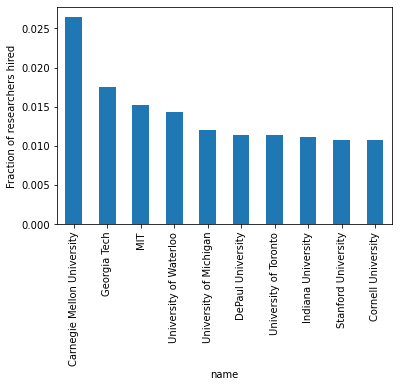

In [15]:
plot_hiring.plot.bar();
plt.ylabel('Fraction of researchers hired');

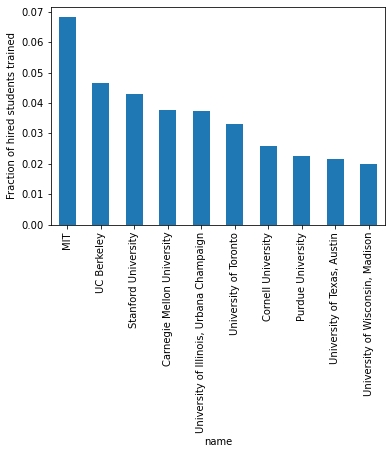

In [16]:
plot_hired.plot.bar();
plt.ylabel('Fraction of hired students trained');

3.

**B** and **C**, in-degree and out-degree, which as already explained (and showed) coincide respectively with the number of hired researched and the number of trained researchers.

4.

**False**. In general, we can think that in-degree, the number of hired researchers, correlates with how big an university is and how much funding it has, while out-degree, the number of researchers trained, correlates with quality of education, which also correlates with score. The two measures, though, might not be correlated with one another, or also be negatively correlated. Therefore, PageRank centrality, which would assign to each university a centrality mainly based on its inlinks, would not necessarily correlate with score, but more with size of universities.

This can also be tested experimentally, as below.

In [17]:
pagerank_centralities = nx.algorithms.link_analysis.pagerank_alg.pagerank(G)
pagerank_centralities = sorted(pagerank_centralities.items(), key=itemgetter(1), reverse=True)
pagerank_centralities[:10]

[(204, 0.05696520701518409),
 (194, 0.0406202568894265),
 (198, 0.036056540613184467),
 (200, 0.03416499931376037),
 (180, 0.027669420891804557),
 (193, 0.025301345770629247),
 (181, 0.02489954006952596),
 (191, 0.022859592201519896),
 (179, 0.015306314006972249),
 (140, 0.012049017817743818)]

We can immediately see that the highests PageRank centralities belong to universities with low scores, meaning that at the opposite it seems to be negatively correlated with scores. This correlation would need, though, more rigorous statistical analysis to be conclusively established.

### Task 2 — (15 points)

Each hiring decision $(u,v)$ connects two different universities with different scores.

1. Divide the universities into quintiles according to their scores ($Q_1$ to $Q_5$, where $Q_5$ contains the highest-ranked universities, i.e., those with the highest scores). Create a succinct plot that captures, for each pair of quintiles ($Q_i$, $Q_j$), what fraction of people in the dataset who got their Ph.D. from a university in $Q_i$ were hired by a university in $Q_j$.


2. **/Multiple choice:/** What does the plot made in the previous subtask reveal about the faculty hiring process? Select one of the following options and justify your answer.
    1. Ph.D. graduates who are hired as professors usually go to universities that are better than the universities where they were trained.
    2. Ph.D. graduates who are hired as professors usually go to universities that are around the same or worse than the universities where they were trained.

3. **/True or false:/** Let $E$ be the set of edges from the hiring network, and let $X$ be defined as follows:
$$X = \frac{|(u,v) \in E : u \in Q_1 \text{ and } v \in Q_5 |}{{|(u,v) \in E : u \in Q_1|}}$$
 *Thinking critically about the data that was given to you,* is the following statement **true** or **false**? Justify your answer. **"If I get my Ph.D. in a 1st-quintile university, I have a chance of around X * 100%  of getting a job in a 5th-quintile university."**


---
**Hints:**
- [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) makes splitting data into quantiles easy!


1.

In [18]:
# Split into quantiles and enrich the DataFrame
nodes['people_hired'] = number_hiring
nodes['people_trained'] = number_hired
nodes['quantile'] = pd.qcut(nodes.score, q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

nodes.head(10)

,score,name,people_hired,people_trained,quantile
u,,,,,
1,100.000000,Stanford University,47,189.0,Q5
2,99.956665,UC Berkeley,43,204.0,Q5
3,99.301230,MIT,67,299.0,Q5
4,98.369536,California Institute of Technology,13,40.0,Q5
5,97.892855,Harvard University,20,68.0,Q5
6,96.717404,Cornell University,47,113.0,Q5
7,96.181139,Carnegie Mellon University,116,166.0,Q5
8,96.159471,Princeton University,28,82.0,Q5
9,95.801961,Yale University,20,47.0,Q5


In [19]:
# Enrich edges DataFrame with quantiles
edges['u_quantile'] = nodes.loc[edges.u.values]['quantile'].values
edges['v_quantile'] = nodes.loc[edges.v.values]['quantile'].values
edges.head(10)

,u,v,gender,u_quantile,v_quantile
0,1,1,F,Q5,Q5
1,1,1,F,Q5,Q5
2,1,1,F,Q5,Q5
3,1,1,M,Q5,Q5
4,1,1,M,Q5,Q5
5,1,1,F,Q5,Q5
6,1,1,F,Q5,Q5
7,1,1,F,Q5,Q5
8,1,1,M,Q5,Q5
9,1,2,F,Q5,Q5


In [20]:
# Compute number of people 
pairwise_counts = edges.groupby('u_quantile').v_quantile.value_counts()
pairwise_counts.index = pairwise_counts.index.set_names(['training_university', 'hiring_university'])
pairwise_counts= pairwise_counts.reset_index()
pairwise_counts = pairwise_counts.rename({'v_quantile': 'counts'}, axis=1)
pairwise_counts

,training_university,hiring_university,counts
0,Q1,Q1,63
1,Q1,Q2,5
2,Q1,Q3,4
3,Q1,Q5,1
4,Q1,Q4,0
5,Q2,Q2,68
6,Q2,Q1,61
7,Q2,Q3,16
8,Q2,Q4,11
9,Q2,Q5,4


Interpreting the question as "**fraction of people in the dataset who got their Ph.D. from a university $Q_i$**" (denominator of the fraction = number of people who did their PhD in university $Q_i$) and not as "**fraction of people in the dataset,** who got their Ph.D. from a university $Q_i$" (denominator of the fraction = number of people in the dataset)

In [21]:
trained_by_quantile = pairwise_counts.groupby('training_university').counts.sum()
trained_by_quantile

training_university
Q1      73
Q2     160
Q3     361
Q4     721
Q5    3073
Name: counts, dtype: int64

In [22]:
# Converting counts to fractions
pairwise_counts.counts = pairwise_counts.counts / trained_by_quantile[pairwise_counts.training_university.values].values
pairwise_counts

,training_university,hiring_university,counts
0,Q1,Q1,0.863014
1,Q1,Q2,0.068493
2,Q1,Q3,0.054795
3,Q1,Q5,0.013699
4,Q1,Q4,0.000000
5,Q2,Q2,0.425000
6,Q2,Q1,0.381250
7,Q2,Q3,0.100000
8,Q2,Q4,0.068750
9,Q2,Q5,0.025000


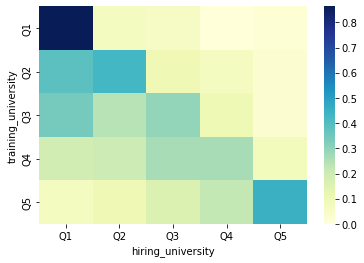

In [23]:
# Prepare data for plotting
data_heat = pairwise_counts.pivot(index='training_university', columns='hiring_university', values='counts')
sns.heatmap(data_heat, cmap="YlGnBu");

2.

**B**, Ph.D. graduates who are hired as professors usually go to universities that are around the same or worse than the universities where they were trained.
This is evident as the "heatmap matrix" is lower-diagonal-like, meaning that hired researchers tend to get hired at universities at the same level or worse than the ones where they were trained, and only rarely get hired at better universities.

3.

**False**. The data only show students who later where hired and became researchers, and not all students. Therefore, the statement would be true only if the assumptions would include obtaining a PhD in Q1 but also getting hired somewhere.

### Task 3 — (25 points)

Let the "source university" of a person be the university at which the person got their Ph.D., and let their "target university" be the university at which they were hired after their Ph.D.


1. For each hiring decision $(u, v)$, let the score gain ($d$) be defined as the difference between the scores of the target university and the source university (target university score minus source university score; see hint for example). Calculate the average difference for men ($\bar{d_{M}}$) and for women ($\bar{d_{F}}$) in the dataset. Determine whether the difference between these two averages ($\bar{d_{M}}$ and $\bar{d_{F}}$) is statistically significant.

2. **/True or false:/** Is the following statement **true** or **false**? Justify your answer. **"The results you obtained in Task 3.1 do not refute the hypothesis that women are disadvantaged in the faculty hiring process."**

3. For each quintile $Q$ from Task 2.1, calculate the following: **(a)** the percentage of women among hiring decisions $(u, v)$ with $u \in Q$ ; and **b)** the average score gain for hiring decisions $(u, v)$ with $u \in Q$.

4. **/Discuss:/** Considering the results obtained in Task 3.3, why is comparing the average score gain for men ($\bar{d_{M}}$) and women ($\bar{d_{F}}$) insufficient for determining the causal effect of gender on score gain?

5. Use `statsmodels` to run a linear regression where hiring decisions (edges of the hiring network) are the data points, gender and source-university score are the predictors, and score gain is the outcome. Report the summary of your model.

6. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. **"The results you obtained in Task 3.5 suggest that academic hiring decisions are unfair to women."**

---
**Hint** — The university with the best score is Stanford University (score 100), and the university with the 10th best score is the University of Washington (score 95.26). If someone was trained at Stanford and then got a job at the University of Washington, their score gain is $95.26 - 100 = -4.74$.

In [24]:
edges['u_score'] = nodes.loc[edges.u.values]['score'].values
edges['v_score'] = nodes.loc[edges.v.values]['score'].values
edges['score_gain'] = edges['v_score'] - edges['u_score']
edges.head(20)

,u,v,gender,u_quantile,v_quantile,u_score,v_score,score_gain
0,1,1,F,Q5,Q5,100.0,100.000000,0.000000
1,1,1,F,Q5,Q5,100.0,100.000000,0.000000
2,1,1,F,Q5,Q5,100.0,100.000000,0.000000
3,1,1,M,Q5,Q5,100.0,100.000000,0.000000
4,1,1,M,Q5,Q5,100.0,100.000000,0.000000
5,1,1,F,Q5,Q5,100.0,100.000000,0.000000
6,1,1,F,Q5,Q5,100.0,100.000000,0.000000
7,1,1,F,Q5,Q5,100.0,100.000000,0.000000
8,1,1,M,Q5,Q5,100.0,100.000000,0.000000
9,1,2,F,Q5,Q5,100.0,99.956665,-0.043335


In [25]:
edges.groupby('gender').score_gain.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,2009.0,-25.201988,25.571818,-94.18233,-42.673745,-19.570987,-3.818861,42.462488
M,2379.0,-23.255171,25.625527,-96.21364,-40.618060,-18.444288,-3.120091,66.031093


In [26]:
edges_male = edges[edges.gender == 'M']
edges_female = edges[edges.gender == 'F']

In [27]:
stats.bootstrap([edges_male.score_gain], np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=-24.295240943765204, high=-22.24208709685244), standard_error=0.525090369052245)

In [28]:
stats.bootstrap([edges_female.score_gain], np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=-26.3051268200566, high=-24.109006737340362), standard_error=0.5625313694810107)

In [29]:
stats.ttest_ind(edges_male.score_gain, edges_female.score_gain)

Ttest_indResult(statistic=2.5097073505441556, pvalue=0.01211886846683103)

We can see that the boostrapped confidence intervals are only slightly overlapping. Furtheremore, the t-test reveals that under the assumption that the two distributions have the same mean, the probabilities of obtaining data at least as extreme (means as different) as the ones obtaines is close to 0.01. Therefore, the difference is statistically significant.

2.

**True**. The results would seem to indicate that indeed women are disadvantaged in the faculty hiring process since their score_gain is lower, which means that they are hired in relatively worst (compared to the ones where they were trained) universities with respect to males. However, this hypothesis needs further investigation.

3.

For each quintile  𝑄  from Task 2.1, calculate the following: (a) the percentage of women among hiring decisions  (𝑢,𝑣)  with  𝑢∈𝑄  ; and b) the average score gain for hiring decisions  (𝑢,𝑣)  with  𝑢∈𝑄 .

In [30]:
gender_by_uquantile = edges.groupby('u_quantile').gender.value_counts(normalize=True)
gender_by_uquantile

u_quantile  gender
Q1          M         0.890411
            F         0.109589
Q2          M         0.800000
            F         0.200000
Q3          M         0.700831
            F         0.299169
Q4          M         0.597781
            F         0.402219
Q5          F         0.511227
            M         0.488773
Name: gender, dtype: float64

In [31]:

female_percentages = gender_by_uquantile.unstack()['F']*100
female_percentages

u_quantile
Q1    10.958904
Q2    20.000000
Q3    29.916898
Q4    40.221914
Q5    51.122681
Name: F, dtype: float64

In [32]:
# Print average score gain by quantile
edges.groupby('u_quantile').score_gain.mean()

u_quantile
Q1     2.215927
Q2    -1.689948
Q3   -14.244373
Q4   -23.425257
Q5   -27.274451
Name: score_gain, dtype: float64

4.

Comparing the average by gender is insufficient because it does not take into account the gender distribution of students from source universities. In fact, the results of points 3. show that hiring decisions in high quantiles include a higher percentage of women with respect to low quantiles, and at the same time the score gain in high quantiles is lower than for low quantiles. Therefore, the result seen in point 2. could be entirely produced by this gender asymmetry by quantile in hiring decisions. It is thus not possible to conclude anything from the naive average comparison of point 2.

5.

In [33]:
mod = smf.ols(formula='score_gain ~ u + C(gender, Treatment(reference="M"))', data=edges)
res = mod.fit()

In [34]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_gain   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     119.7
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           2.37e-51
Time:                        11:13:04   Log-Likelihood:                -20340.
No. Observations:                4388   AIC:                         4.069e+04
Df Residuals:                    4385   BIC:                         4.071e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

6.

**False**. When considering both gender and source-university (hence, source quantile), overcoming with regression the correlation between them, it appears that the being female translates in a higher score gain, meaning that females are likely to be hired in universities slightly better, with respect to the ones where they were trained, than males.

## Part 2 — Tennis interviews

For the second part of the exam, you will work with text data extracted from questions asked during post-match tennis interviews and from
TV commentary done during the tennis match.


Examples of interview questions:

> That last set seemed like a faultless performance. Is that the way you saw it?

> How disappointing is that loss for you?

> As a spectator, would you rather watch a guy with big aces or a match with lots of rallies?

Example of commentary text:

>  Serena is desperate to shake herself into action. She lets out an almighty shriek when she goes 30-15 up, but Azarenka responds with a brilliant forehand. The level of Williams' scream goes up and up during the next point, and she lets out another roar when she belts a forehand cross court win the point. She wraps the game up next time round, and she looked something like back to her best there!


## Files (in the `data` folder)

- `questions.tsv.gz` a tab-separated compressed file containing interview questions
and some metadata. We refer to this dataset as the "questions dataset."
Each row contains a question made to a specific player after a match.
The file has the following columns:
    - `questions` — the text of the question asked; **Note that you will never be asked to use this row; it is merely meant to help you understand the data better**.
    - `gender` — the gender of the player;
    - `ranking` — the ranking of the player at the time;
    - `similarity` — this column will be explained later in the exam.

- `commentary.tsv.gz` a tab-separated compressed file containing TV commentary done during
the tennis match. We refer to this dataset as the "commentary dataset." Each line contains
a piece of commentary done in a tennis match.
The file has the following columns:
    - `commentary` — the text of the commentary; **Note that you will never be asked to use this row; it is merely meant to help you understand the data better**.
    - `gender` — the gender of the players in the match;

- `TFIDF.npz`, a file containing 2D numpy arrays saved in the `.npz` format that
will be used in Task 4.

Both datasets are **balanced regarding gender,** i.e., they have the same number of rows about men as about women.


Commentary text, as well as interview questions, have been preprocessed to make your life easier, as follows:

- We replaced all words starting with upper-case letters with the special string `'--ENT--'`. This was done to remove personal names (e.g., Alice, Bob), which could help predict whether the text is associated with a male or a female tennis player.
- We removed the first word in each sentence. This was done because, for the first word of each sentence, it is difficult to know whether it is a personal name or simply a regular word.
- We replaced all gendered pronouns in the text (he/him/his and she/her/hers) with the special string `'--PRON--'`. This, too, was done because these words would make it easy to predict whether the text is associated with a male or a female tennis player.
- We removed punctuation and stop words (to reduce the dimensionality of the data).

The above example commentary text thus appears as follows in the data provided to you:

> desperate shake action lets almighty shriek --PRON-- goes 30 15 --ENT-- responds brilliant forehand level --ENT-- scream goes point --PRON-- lets roar --PRON-- belts forehand cross court win point wraps game time round --PRON-- looked like --PRON-- best

We also provide some code for loading and displaying the dataset:

In [35]:
#  Part 2 ! PROVIDED CODE !

questions = pd.read_csv("./data/part-2/questions.tsv.gz", sep="\t", compression="infer")
commentary = pd.read_csv("./data/part-2/commentary.tsv.gz", sep="\t", compression="infer")

### Task 4  (20 points)

Your goal now is to investigate whether there is gender bias in the questions being asked to female vs. male players, i.e., whether men vs. women are asked different questions on average. You start your analysis with a classification framing.


To make your life easier, we already provided a TF-IDF matrix for each dataset (`commentary.tsv.gz` and `questions.tsv.gz`) and with code to load these matrices (which are numpy arrays).

- Each row in each matrix $M$ corresponds to a row in the corresponding dataframe, i.e., each row corresponds to a different question or a different piece of TV commentary.
- Each column in each matrix corresponds to a different word from the vocabulary.
- Each position $(i,j)$ in the matrix contains the TF-IDF score for word $j$ from the vocabulary in question or commentary $i$. That is, each term $M[i,j]$ corresponds to the term frequency (TF) of word $j$ in text $i$, multiplied by the inverse document frequency (IDF) of word $j$:


$$M[i,j] = \text{TF}(i,j) * \text{IDF}(j)$$


1. **/Multiple Choice:/** Which of the following is the correct way to calculate the term frequency and the inverse document frequency? Justify your answer, explaining what each of the two components should capture.
    - Option A:

    $$\text{TF}(i,j) = \text{number of times the $j$-th word occurs in all documents} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents the $j$-th word occurs in}}{\text{number of documents}}$$

    - Option B:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in the $i$-th document} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents the $j$-th word occurs in}}{\text{number of documents}}$$

    - Option C:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in all documents} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents}}{\text{number of documents the $j$-th word occurs in}}$$

    - Option D:

    $$ \text{TF}(i,j) = \text{number of times the $j$-th word occurs in the $i$-th document} $$

    $$\text{IDF}(j) =  \log \frac{\text{number of documents}}{\text{number of documents the $j$-th word occurs in}}$$



2. Leveraging the matrices described above, train two logistic regression classifiers (one for interview questions, the other for TV commentary) that use the TF-IDF vectors as features to predict the gender of the athletes. You should split each dataset into training and test sets using sklearn (see [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) using parameters `test_size=0.4` and `random_state=42`. You should use sklearn's logistic regression model (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)) using parameters `C=10` (which controls regularization) and `max_iter=2000`. For each dataset, train the model on the training set (with 60% of the data) and report the accuracy on the test set (with 40% of the data).

3. **/True or false:/** Considering the following statement, answer **true** or **false** and justify your answer. **"Based on the outcome of Task 4.2, the text from tennis commentary text is more gender-biased than post-match questions."**

4. The parameter `C` above controls a regularization penalty. The lower `C`, the stronger the regularization penalty (caveat: sklearn’s convention is the reverse of the convention you saw in class, where a *higher* $\lambda$ parameter meant a stronger regularization penalty ). For the questions dataset, re-run the classification task using the same setup as in Task 4.2, but now with `C=2000`. Report the accuracy.

5. **/Discuss:/** Explain why increasing `C` changed the results.


In [36]:
# 4.2 ! PROVIDED CODE !
tmp = np.load("./data/part-2/TFIDF.npz")
TFIDF_commentary = tmp['commentary']
TFIDF_questions = tmp['questions']

TFIDF_questions

array([[0.60373585, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19567434],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13978562, ..., 0.        , 0.        ,
        0.        ],
       [0.59027928, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

1.

**Option D**.
In fact, the term frequency of a document represents the number of times that each word has appeared in that document, i.e. its bag-of-words representation. Therefore, the (i, j) entry needs to be referred to document i. The inverse document frequency is meant to rescale the TF counts in order for rare words, assumed to be more informative than common ones, to have more weight. Therefore, the log must have at the denominator the frequency of a word, so that low-frequency words will have higher IDF.

2.

In [37]:
# Encore the gender as 0-1 outcome (0 males, 1 females)
y_commentary = (commentary.gender == 'F').astype(int).values
y_questions = (questions.gender == 'F').astype(int).values

In [38]:
# c for commentary, q for questions
Xc_train, Xc_test, yc_train, yc_test = train_test_split(TFIDF_commentary, y_commentary, test_size=0.4, random_state=42)
Xq_train, Xq_test, yq_train, yq_test = train_test_split(TFIDF_questions, y_questions, test_size=0.4, random_state=42)

In [39]:
model_commentary = LogisticRegression(C=10, max_iter=2000)
model_questions = LogisticRegression(C=10, max_iter=2000)

In [40]:
# Train and predict
model_commentary.fit(Xc_train, yc_train)
yc_pred = model_commentary.predict(Xc_test)

model_questions.fit(Xq_train, yq_train)
yq_pred = model_questions.predict(Xq_test)

In [41]:
accuracy_score(yc_test, yc_pred)

0.5133333333333333

In [42]:
accuracy_score(yq_test, yq_pred)

0.7108333333333333

3.

**False**. It's the opposite, from the outcome of 4.2. the text from post-match questions seems to be more gender-biased than the text from commentaries, since a Logistic Regression model with the same parameters has performanced much better in idenfying the gender of players when trained on post-match questions rather than match commentary. This however could also be due to differences in the original datasets, not necessarily equally representative, and thus should not be taken as a final conclusion.

4.

In [43]:
model2_questions = LogisticRegression(C=2000, max_iter=2000)

In [44]:
model2_questions.fit(Xq_train, yq_train)
yq_pred2 = model2_questions.predict(Xq_test)

In [45]:
accuracy_score(yq_test, yq_pred2)

0.6891666666666667

5.

C is controlling the regularization strength, that is how much large weights are penalized during training. The higher the regularization strength (the lower the C), the lower will be the norm of the resulting weights (parameters) of the model. Changing C, therefore, is in general always changing the results since the loss function is different. In this particular case, the accuracy has decreased after augmenting C, meaning that the model would benefit from a stronger (with respect to C=2000) regularization (=lower C), to reduce overfit to the training set and improve generalization.

### Task 5 — (20 pts)

You will now further inspect whether there is gender bias in the interview questions using an observational study framing. For this task, you will use the column `similarity` provided in the questions dataframe. This column captures how similar each question is to tennis-related text, i.e., a higher score indicates that the question is more about the topic of tennis. In contrast, a lower score means that the question may be personal or about other subjects.

1. Using `statsmodels`, run a linear regression with `similarity` as the predictor and `gender` as the outcome. Report the summary of your model.

2. **/True or false:/** According to the previous analysis, determine if the following statement is **true** or **false** and justify your answer. **"Men are asked questions unrelated to tennis more often than women."**

3. The ranking of players is a potential confounder here. We do not know whether the male and female players in the dataset have similar rankings. In that context, compute the average ranking for men and women. Determine if the difference is statistically significant. Additionally, create a scatter plot showing the relationship between ranking (on the y-axis) and similarity (in the x-axis) and compute Spearman's rank-correlation coefficient between `ranking` and `similarity`.

4. **/True or false:/** Assume that no variable other than `gender` and `ranking` can have any influence on the `similarity` of each question. Based on the analysis of the previous question, is the following statement **true** or **false**? Justify your answer. **"Ranking is not a worrisome confounder for the regression of Task 5.1."**

1.

In [46]:
mod = smf.ols(formula='similarity ~ C(gender, Treatment(reference="M"))', data=questions)
res = mod.fit()

In [47]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             similarity   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     841.1
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          3.16e-163
Time:                        11:13:21   Log-Likelihood:                 77.527
No. Observations:                3000   AIC:                            -151.1
Df Residuals:                    2998   BIC:                            -139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

2.

**False**. It's the opposite, men seem to be aked on average questions more related to tennis than women, as can be seen from the fact that the coefficient of the gender predictor, assuming value 0 for males and 1 for females, is negative.

3.

In [48]:
# average ranking by gender
questions.groupby('gender').ranking.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,1463.0,503.617908,289.348305,1.0,253.0,496.0,763.5,999.0
M,1537.0,495.202342,289.576069,1.0,246.0,490.0,742.0,999.0


In [49]:
questions_male = questions[questions.gender == 'M']
questions_female = questions[questions.gender == 'F']

In [50]:
stats.bootstrap([questions_male.ranking], np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=480.45682199275365, high=509.6567732834145), standard_error=7.422960514469244)

In [51]:
stats.bootstrap([questions_female.ranking], np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=489.16362115470037, high=518.5684290214813), standard_error=7.513473669905023)

In [52]:
stats.ttest_ind(questions_male.ranking, questions_female.ranking)

Ttest_indResult(statistic=-0.7959498763790183, pvalue=0.42612418722112966)

We can see that the boostrapped confidence intervals are hugely overlapping. Furtheremore, the t-test reveals that under the assumption that the two distributions have the same mean, the probabilities of obtaining data at least as extreme (means as different) as the ones obtaines is close to 0.43. Therefore, the difference **is not** statistically significant.

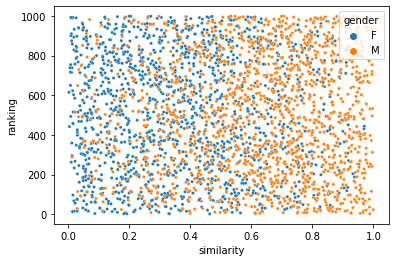

In [53]:
sns.scatterplot(x='similarity', y='ranking', hue='gender', data=questions, s=10);

In [54]:
stats.spearmanr(questions.ranking, questions.similarity)

SpearmanrResult(correlation=-0.00793480965681015, pvalue=0.663973935968952)

Under the null hypothesis of rankings and similarities being uncorrelated system, the probabilities of having data with a Spearman correlation at least as extreme as the one obtained is 0.66. Therefore, we cannot reject the null hypothesis and the two variable do not seem to be correlated according to Spearman rank-correlation coefficient.

4.

**True**. In fact, it appears that there is not a statistically significant difference in the rankings of male and female players in the dataset, meaning that the ranking covariate is balanced among treatment (=gender) and will thus not influence the results of our observational study. Moreover, the result covariate seems also to not be correlated with the similarity, i.e. the outcome. Therefore, in a causal diagram, the ranking covariate would not have arrows neither connecting it to the treatment nor to the outcome.